# Logistic Regression
In this part of the exercise, we built a logistic regression model to predict whether a student gets admitted into a university. Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision. Our task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams.<br>

The file <strong><em>ex2data1.csv</em></strong> contains a training set.<br>
The structure of the dataset described blow:<br>
1. First column = <strong>First exam score</strong> 
2. Second column = <strong>Second exam score</strong>
3. Third column = <strong>Admit status</strong>

<br> <br>
<strong>
Our assignment has these sections:
1. Visualizing the Data
    1. Loading dataset
    2. Ploting scatter
        1. 2D scatter
        2. 3D scatter
2. Implementation
    1. Sigmoid Function (Warmup)
    2. Cost Function and Gradient
    3. Learning Parameters Using <em>fminunc</em>
    4. Evaluating logistic regression
3. Visualization of Model
</strong>

In each section full description provided.

## 1. Plotting Dataset
Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot. (Many other problems that you will encounter in real life are multi-dimensional and can’t be plotted on a 2D plot.)

### 1.A Loading Dataset
We just need to import our data in file to a good structrue to work on it. So best option for us in python is <strong>Pandas</strong>.

In [1]:
# import library
import pandas as pd
import numpy as np

dataset = pd.read_csv('ex2data1.csv',names = ['Exam #1','Exam #2','Admitted'])
dataset.head()

,Exam #1,Exam #2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [18]:
# splitting to x and y variables for features and target variable
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
print('x[0] ={}, y[0] ={}'.format(x[0],y[0]))
m, n = x.shape
print('#{} Number of training samples, #{} features per sample'.format(m,n))

x[0] =[ 34.62365962  78.02469282], y[0] =0
#100 Number of training samples, #2 features per sample


### 1.B Plotting Scatter
In this step we plot our data in 2D and 3D scatter.

#### 1.B.a 3D Scatter

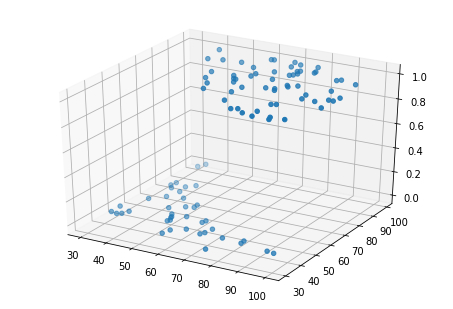

In [19]:
# imporing libraries
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
%matplotlib inline

# visualize our data
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(x[:,0], x[:,1], y)
plt.show()

#### 1.B.b 2D Scatter

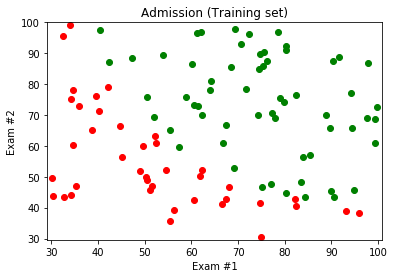

In [20]:
# Visualising the Training set
from matplotlib.colors import ListedColormap
X_set, y_set = x, y
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Admission (Training set)')
plt.xlabel('Exam #1')
plt.ylabel('Exam #2')
plt.show()

## 2. Implementation

### 2.A Sigmoid Function (Warm up)
Before you start with the actual cost function, recall that the <strong>logistic regression hypothesis</strong> is defined as:
<img src = 'img/lr-h.jpg'> <br>
where function g is the sigmoid function. The sigmoid function is defined as: <img src='img/sigmoid.jpg'><br>
For <strong>large positive</strong> values of x, the sigmoid should be <strong>close to 1</strong>, while for <strong>large negative</strong> values, the sigmoid should be <strong>close to 0</strong>. Evaluating <strong>sigmoid(0) should give you </strong>exactly 0.5</strong>. <strong>For a matrix, your function should perform the sigmoid function on every element</strong>.

<strong>h = hypothesis(x,theta)</strong> will compute <strong>sigmoid</strong> function on <strong>θ<sup>T</sup>X</strong> and return a number which <strong>0<=h<=1</strong>.<br>
You can use <a href='https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.special.expit.html'>this</a> library for calculating sigmoid.

In [21]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [22]:
def lr_hypothesis(x,theta):
    return np.dot(x,theta)

## 2.B Cost Function and Gradient
Now you will implement the <strong>cost function</strong> and <strong>gradient</strong> for logistic regression and we return the cost and gradient.<br>
Recall that the <strong>cost function</strong> in logistic regression is: <img src='img/j.jpg'><br>
And the <strong>gradient</strong> of the cost is a vector of the same length as <strong>θ</strong> where the <strong>j <sup>th</sup></strong> element (for j = 0, 1, . . . , n) is defined as follows:<img src='img/gradient.jpg'><br>
<br>
Note that while this gradient looks identical to the linear regression gradient, the formula is actually different because <strong>linear and logistic regression have different definitions of h<sub>θ</sub>(x)</strong>.<br><br>
<strong>Implementation Note:</strong> We store each example as a row in the the <strong>x</strong> matrix in python. To take into account the intercept term <strong>(θ<sub>0</sub>)</strong>, we add an additional first column to <strong>x</strong> and set it to all <strong>ones</strong>. This allows us to treat <strong>(θ<sub>0</sub>)</strong> as simply another <strong>feature</strong>.<br><br>
In the following lines, we add another dimension to our data to accommodate the <strong>(θ<sub>0</sub>)</strong> intercept term. We also initialize the <strong>initial parameters to 0</strong>.

In [23]:
# import library
import numpy as np

# appending ones to our x 
z = np.ones(m)
z = z.reshape(m,1)
x = np.append(z,x,axis =1)

In [24]:
print('x.shape = {}, x[0] = {}'.format(x.shape,x[0]))

x.shape = (100, 3), x[0] = [  1.          34.62365962  78.02469282]


In [25]:
m,n = x.shape
# define theta as zero
theta = np.zeros(n)
theta = theta.reshape(n,1)

# reshape (-1,1) because we just have one feature in y column
y = y.reshape(-1,1)

# iterations to update theta and minimize J
iterations = 1500

# alpha the learning rate in gradient descent update formula
alpha = 0.01

<strong>compute_cost(theta, x, y):</strong> computes the cost of using theta as the parameter for logistic regression and the gradient of the cost.

In [51]:
def compute_cost(theta,x,y):
    infunc = -y*(np.log(sigmoid(lr_hypothesis(x,theta)))) - (1-y)*(np.log(1 - sigmoid(lr_hypothesis(x,theta))))
    j = np.sum(infunc)/m
    
    infunc2 = sigmoid(lr_hypothesis(x,theta))-y
    gradient =  np.dot(x.transpose(),infunc2)/m
    
    return (j,gradient)

Now with <strong>theta = 0 for n values</strong>, we should see that the <strong>cost = 0.693</strong> and <strong>gradients = [0.100, -12.0092, -11.2628]</strong>.

In [52]:
cost_temp, gradient_temp = compute_cost(theta,x,y)
print('if theta = 0  =======>\n cost = {}\n gradient =\n {}'.format(cost_temp,gradient_temp))

if theta = 0  =======>
 cost = 0.6931471805599453
 gradient =
 [[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]


For validating our fucntions work correctly, we should test it on new theta initializations.<br>
<strong>Test theta = [-24; 0.2; 0.2]</strong> and output should be <strong>cost = 0.218</strong> and <strong>gradients = [0.043, 2.566, 2.647]</strong>.

In [58]:
test_theta = np.array([-24,0.2,0.2])
test_theta = test_theta.reshape(n,1)

cost_temp2, gradient_temp2 = compute_cost(test_theta,x,y)
print('if theta = 0  =======>\n cost = {}\n gradient =\n {}'.format(cost_temp2,gradient_temp2))

if theta = 0  =======>
 cost = 0.21833019382659796
 gradient =
 [[ 0.04290299]
 [ 2.56623412]
 [ 2.64679737]]


## 2.C Learning Parameters Using fminunc
In the previous assignment, you found the optimal parameters of a linear regression model by implementing <strong>gradent descent<strong>. </strong>You wrote a cost function and calculated its gradient, then took a gradient descent step accordingly</strong>. This time, instead of taking gradient descent steps, you will use an Octave/-MATLAB built-in function called <strong>fminunc</strong>.<br><br>
Octave/MATLAB’s <strong>fminunc</strong> is an optimization solver that finds <strong>the minimum of an unconstrained<sup>1</sup> function</strong>. For logistic regression, you want to optimize the cost function J(θ) with parameters θ. Concretely, you are going to use <strong>fminunc</strong> to find the best parameters θ for the logistic regression cost function, given a fixed dataset (of x and y values). You will pass to fminunc the following inputs:<br>
    1. The initial values of the parameters we are trying to optimize.
    2. A function that, when given the training set and a particular θ, computes the logistic regression cost and gradient with respect to θ for the dataset (X, y)
<rb>
    <sup>1</sup> Constraints in optimization often refer to constraints on the parameters. for example, constraints that bound the possible values θ can take (e.g., θ ≤ 1). Logistic regression does not have such constraints since θ is allowed to take any real value.